In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

100%|██████████| 50/50 [02:02<00:00,  2.45s/it]


We need 46 callers to make sure we have 60 mins waiting time.
We need 47 callers to make sure we have 30 mins waiting time.


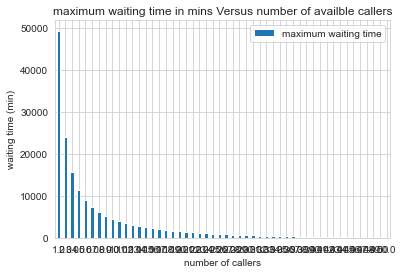

In [7]:
data = pd.read_csv("data.csv")
max_number_of_callers = 50 # the number of availble callers at call center
result = pd.DataFrame(np.zeros((max_number_of_callers,2)),columns=["number of callers","maximum waiting time"])

for number_of_callers in tqdm(range(1,max_number_of_callers+1)):
    caller_availble_time = np.zeros((number_of_callers,))
    index = np.arange(0,number_of_callers)
    data = data.assign(**dict.fromkeys(["caller","wait time"], 0))

    # iterate through all incoming calls sequentially and assign them callers to minimise their waiting time
    for i in range(data.shape[0]):
        # check the incoming call waiting time when different callers are assigned
        wait_time = data["Time"][i] - caller_availble_time
        # assign the caller to the incoming call to minimise waiting time
        wait_time_max = wait_time.max()
        caller_index = index[min(index[wait_time == wait_time_max])]
        data["caller"][i] = caller_index
        data["wait time"][i] = max(-wait_time_max,0)
        caller_availble_time[caller_index] += data["Duration of calls"][i]

    result["number of callers"][number_of_callers-1] = number_of_callers
    result["maximum waiting time"][number_of_callers-1] = data["wait time"].max()

result.plot.bar(x='number of callers', y='maximum waiting time', title='maximum waiting time in mins Versus number of availble callers', ylabel='waiting time (min)', rot=0)

min_wait_time = 60
print("We need {} callers to make sure we have {} mins waiting time.".format(result["number of callers"][np.where(result["maximum waiting time"].values<=min_wait_time)[0].min()].astype(np.int32), min_wait_time) )

min_wait_time = 30
print("We need {} callers to make sure we have {} mins waiting time.".format(result["number of callers"][np.where(result["maximum waiting time"].values<=min_wait_time)[0].min()].astype(np.int32), min_wait_time) )
